# Embedded SSPERK$(s,2)$ pairs

Consider the case SSPERK($s$,2) with our suggested embedded pairs. These are $$b_1^T=\left(\frac{1}{s-1},\ldots,\frac{1}{s-1},0\right)\quad \text{and}\ \quad b_2^T=\left(\frac{s+1}{s^2},\frac{1}{s},\ldots,\frac{1}{s},\frac{s-1}{s^2}\right).$$

Below we compare our pairs and the original method based on different measumerement values from the paper of van der Marel (1990).

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from nodepy import rk
import numpy as np
import math

In [23]:
s = 2
rk2 = rk.SSPRK2(s)
#print rk2

# Real stability interval, Imaginary stability interval, Circle contractivity radius
print rk2.__num__().real_stability_interval(mode='float')
print rk2.__num__().imaginary_stability_interval(mode='float')
print rk2.__num__().circle_contractivity_radius()
print rk2.__num__().absolute_monotonicity_radius()

2.0
2.98023223877e-08
1.0
0.999999999931


[ 1.  0.]
2.0
0
1.0
0.999999999931


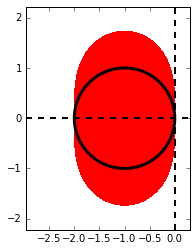

In [25]:
# Case b_1
b1 = 1./(s-1) * np.ones(s); b1[s-1]=0;
print b1
rk_b1pair = rk.ExplicitRungeKuttaPair(rk2.A,rk2.b,b1)
fig1=rk_b1pair.plot_stability_region(N=1000);
fig1.axes[0].set_title('')
#plt.savefig('SSPERKs2.pdf', format='pdf', dpi=10000)

print rk_b1pair.embedded_method.__num__().real_stability_interval(mode='float')
print rk_b1pair.embedded_method.__num__().imaginary_stability_interval(mode='float')
print rk_b1pair.embedded_method.__num__().circle_contractivity_radius()
print rk_b1pair.embedded_method.__num__().absolute_monotonicity_radius()


[ 0.75  0.25]
4.0
0
1.26794919243
0.999999999931


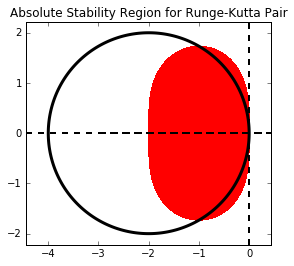

In [27]:
# Case b_2
b2 = 1./(s) * np.ones(s); b2[0]=(s+1.)/(s*s); b2[s-1]=(s-1.)/(s*s);
print b2
rk_b2pair = rk.ExplicitRungeKuttaPair(rk2.A,rk2.b,b2)
fig2=rk_b2pair.plot_stability_region(N=1000);
#fig2.axes[0].set_title('')
#plt.savefig('SSPERKs2.pdf', format='pdf', dpi=10000)

print rk_b2pair.embedded_method.__num__().real_stability_interval(mode='float')
print rk_b2pair.embedded_method.__num__().imaginary_stability_interval(mode='float')
print rk_b2pair.embedded_method.__num__().circle_contractivity_radius()
print rk_b2pair.embedded_method.__num__().absolute_monotonicity_radius()

Below we compare our pairs and the original method based on different measumerement values from the paper of Kennedy and Carpenter (2000).

In [21]:
rk2 = rk.SSPRK2(s)
original=rk2.error_metrics()
print [float(original[i]) for i in xrange(len(original))]
b1 = 1./(s-1) * np.ones(s); b1[s-1]=0;
rk2.b=b1
embedded1=rk2.error_metrics()
print [float(embedded1[i]) for i in xrange(len(embedded1))]
b2 = 1./(s) * np.ones(s); b2[0]=(s+1.)/(s*s); b2[s-1]=(s-1.)/(s*s);
rk2.b=b2
embedded2=rk2.error_metrics()
print [float(embedded2[i]) for i in xrange(len(embedded2))]

[0.18633899812498247, 0.16666666666666666, 0.14433756729740643, 0.125, 1.0]
[0.5, 0.5, 0.23570226039551584, 0.16666666666666666, 1.0]
[0.25, 0.25, 0.1717960677340692, 0.16666666666666666, 1.0]
